In [125]:
import pandas as pd

# PATH_NAMES
UP_GYM_1 = '../../inputs/upstairs_chris.xls'
UP_GYM_2 = '../../inputs/upstairs_ana.xls'
DOWN_GYM_1 = '../../inputs/downstairs_chris.xls'
DOWN_GYM_2 = '../../inputs/downstairs_ana.xls'

UP_UNI_1 = '../../inputs/upstairs_with_barometer_1.xls'
UP_UNI_2 = '../../inputs/upstairs_with_barometer_2.xls'
DOWN_UNI_1 = '../../inputs/downstairs_with_barometer_1.xls'
DOWN_UNI_2 = '../../inputs/downstairs_with_barometer_2.xls'

UP_WITH_WALK_UNI_1 = '../../inputs/up_and_down_with_walk_in_between/upstairs_with_barometer_1.xls'
UP_WITH_WALK_UNI_2 = '../../inputs/up_and_down_with_walk_in_between/upstairs_with_barometer_2.xls'
DOWN_WITH_WALK_UNI_1 = '../../inputs/up_and_down_with_walk_in_between/downstairs_with_barometer_1.xls'
DOWN_WITH_WALK_UNI_2 = '../../inputs/up_and_down_with_walk_in_between/downstairs_with_barometer_2.xls'

In [126]:
def get_data_frames(file_names_list, accel_df=[], gyro_df=[], accel_linear_df=[]):
    for name in file_names_list:
        accel_df.append(pd.read_excel(open(name, 'rb'), sheet_name="Accelerometer"))
        gyro_df.append(pd.read_excel(open(name, 'rb'), sheet_name="Gyroscope"))
        accel_linear_df.append(pd.read_excel(open(name, 'rb'), sheet_name="Linear Acceleration"))
    return [accel_df, gyro_df, accel_linear_df]

In [127]:
FILE_NAMES_UPSTAIRS = [UP_GYM_1, UP_GYM_2, UP_UNI_1, UP_UNI_2]
FILE_NAME_DOWNSTAIRS = [DOWN_GYM_1, DOWN_GYM_2, DOWN_UNI_1, DOWN_UNI_2]

In [128]:
[df_upstairs_accel_list, df_upstairs_gyro_list, df_upstairs_accel_linear_list] = \
    get_data_frames(FILE_NAMES_UPSTAIRS)
df_upstairs_accel = pd.concat(df_upstairs_accel_list)
df_upstairs_gyro = pd.concat(df_upstairs_gyro_list)
df_upstairs_accel_linear = pd.concat(df_upstairs_accel_linear_list)


[df_downstairs_accel_list, df_downstairs_gyro_list, df_downstairs_accel_linear_list] = get_data_frames(
    FILE_NAME_DOWNSTAIRS)
df_downstairs_accel = pd.concat(df_downstairs_accel_list)
df_downstairs_gyro = pd.concat(df_downstairs_gyro_list)
df_downstairs_accel_linear = pd.concat(df_downstairs_accel_linear_list)

In [129]:
def removeNulls(df_sets):
    print("No. of nulls: {}".format(df_sets.isna().sum().sum()))
    df_no_nulls = df_sets.dropna()
    print("No. of nulls: {}".format(df_no_nulls.isna().sum().sum()))
    return df_no_nulls

In [130]:
def getDuplicates(df_sets) -> int:
    print("number of duplicates = " + str(df_sets.duplicated().sum()))
    return df_sets.duplicated().sum()

In [131]:
def removeDuplicates(df):
    if getDuplicates(df) > 0:
        df.drop_duplicates(inplace=True)
    print(getDuplicates(df))
    return df

In [132]:
removeDuplicates(df_upstairs_accel_linear)

number of duplicates = 3
number of duplicates = 0
0


,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
0,0.170960,-0.173424,0.004152,0.047689
1,0.190405,-0.178386,-0.313238,-0.114322
2,0.209849,-0.410237,-0.168061,0.051076
3,0.229294,-0.375503,0.120773,-0.187236
4,0.248558,-0.224053,-0.399061,-0.511366
...,...,...,...,...
2978,60.172722,0.222801,-0.657964,0.258509
2979,60.192680,0.365821,-1.358996,0.413707
2980,60.212669,0.237620,-2.157866,0.540158
2981,60.232628,0.106277,-3.145580,0.438494


In [133]:
removeDuplicates(df_downstairs_accel_linear)

number of duplicates = 3
number of duplicates = 0
0


,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
0,0.170960,-0.173424,0.004152,0.047689
1,0.190405,-0.178386,-0.313238,-0.114322
2,0.209849,-0.410237,-0.168061,0.051076
3,0.229294,-0.375503,0.120773,-0.187236
4,0.248558,-0.224053,-0.399061,-0.511366
...,...,...,...,...
2998,60.686468,-0.273792,-0.175345,-0.049015
2999,60.706427,-0.461391,-0.040204,0.437677
3000,60.726416,-0.415000,-0.650795,-0.154382
3001,60.746374,0.255198,-0.547121,-0.742079


In [134]:
df_upstairs_accel.drop(columns=['Time (s)'], inplace=True)
df_upstairs_gyro.drop(columns=['Time (s)'], inplace=True)
df_upstairs_accel_linear.drop(columns=['Time (s)'], inplace=True)

df_downstairs_accel.drop(columns=['Time (s)'], inplace=True)
df_downstairs_gyro.drop(columns=['Time (s)'], inplace=True)
df_downstairs_accel_linear.drop(columns=['Time (s)'], inplace=True)

In [135]:
ups = [df_upstairs_accel, df_upstairs_gyro, df_upstairs_accel_linear]
def gitMinUpLength():
    return min(map(len, ups))

min_len = gitMinUpLength()
df_upstairs_accel = df_upstairs_accel[:min_len]
df_upstairs_gyro = df_upstairs_gyro[:min_len]
df_upstairs_accel_linear = df_upstairs_accel_linear[:min_len]

df_upstairs_accel.index = df_upstairs_accel_linear.index
df_upstairs_gyro.index = df_upstairs_accel_linear.index
df_upstairs_accel_linear.index = df_upstairs_gyro.index

full_data_up = pd.concat([df_upstairs_accel, df_upstairs_gyro, df_upstairs_accel_linear], axis=1)
full_data_up

,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
0,2.009373,6.286543,7.390233,0.074829,0.460579,-0.049326,-0.173424,0.004152,0.047689
1,2.742175,5.432306,6.477969,0.097125,0.106440,-0.033138,-0.178386,-0.313238,-0.114322
2,2.742175,5.432306,6.477969,0.220974,0.035124,0.077730,-0.410237,-0.168061,0.051076
3,1.908874,6.281758,7.389036,0.180200,0.263733,-0.072996,-0.375503,0.120773,-0.187236
4,2.224129,5.791229,6.769295,0.122322,0.126140,-0.057572,-0.224053,-0.399061,-0.511366
...,...,...,...,...,...,...,...,...,...
2978,0.206619,6.346786,-0.008865,-0.109955,0.709900,0.091385,0.222801,-0.657964,0.258509
2979,0.074951,6.387482,-0.470947,0.063675,0.655579,0.102036,0.365821,-1.358996,0.413707
2980,0.005508,6.567047,-0.547562,0.209625,0.587387,0.108429,0.237620,-2.157866,0.540158
2981,-0.217148,6.940536,-0.291382,0.265015,0.518158,0.091385,0.106277,-3.145580,0.438494


In [136]:
print(min(map(len, ups)))

15342


In [138]:
full_data_up_with_label = full_data_up.copy()
full_data_up_with_label.insert(0, 'Activity', 'WALKING_UPSTAIRS')

In [140]:
downs = [df_downstairs_accel, df_downstairs_gyro, df_downstairs_accel_linear]

def gitMinUpLength(data):
    return min(map(len, data))

min_len_down = gitMinUpLength(downs)

df_downstairs_accel = df_downstairs_accel[:min_len_down]
df_downstairs_gyro = df_downstairs_gyro[:min_len_down]
df_downstairs_accel_linear = df_downstairs_accel_linear[:min_len_down]

df_downstairs_accel.index = df_downstairs_accel_linear.index
df_downstairs_gyro.index = df_downstairs_accel_linear.index
df_downstairs_accel_linear.index = df_downstairs_accel_linear.index

full_data_down = pd.concat([df_downstairs_accel, df_downstairs_gyro, df_downstairs_accel_linear], axis=1)
full_data_down

,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
0,2.009373,6.286543,7.390233,0.074829,0.460579,-0.049326,-0.173424,0.004152,0.047689
1,2.742175,5.432306,6.477969,0.097125,0.106440,-0.033138,-0.178386,-0.313238,-0.114322
2,2.742175,5.432306,6.477969,0.220974,0.035124,0.077730,-0.410237,-0.168061,0.051076
3,1.908874,6.281758,7.389036,0.180200,0.263733,-0.072996,-0.375503,0.120773,-0.187236
4,2.224129,5.791229,6.769295,0.122322,0.126140,-0.057572,-0.224053,-0.399061,-0.511366
...,...,...,...,...,...,...,...,...,...
2998,-0.585861,12.449600,1.135559,-0.377335,0.250778,0.207504,-0.273792,-0.175345,-0.049015
2999,-0.684021,12.037796,6.196915,-0.232468,0.256104,0.164886,-0.461391,-0.040204,0.437677
3000,0.086914,11.642761,9.371628,-0.182388,0.275269,0.043457,-0.415000,-0.650795,-0.154382
3001,1.032623,11.094482,7.046844,-0.113159,0.159164,-0.020462,0.255198,-0.547121,-0.742079


In [141]:
full_data_down_with_label = full_data_down.copy()
full_data_down_with_label.insert(9, 'Activity', 'WALKING_DOWNSTAIRS')

In [142]:
full_data_down_with_label

,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Activity
0,2.009373,6.286543,7.390233,0.074829,0.460579,-0.049326,-0.173424,0.004152,0.047689,WALKING_DOWNSTAIRS
1,2.742175,5.432306,6.477969,0.097125,0.106440,-0.033138,-0.178386,-0.313238,-0.114322,WALKING_DOWNSTAIRS
2,2.742175,5.432306,6.477969,0.220974,0.035124,0.077730,-0.410237,-0.168061,0.051076,WALKING_DOWNSTAIRS
3,1.908874,6.281758,7.389036,0.180200,0.263733,-0.072996,-0.375503,0.120773,-0.187236,WALKING_DOWNSTAIRS
4,2.224129,5.791229,6.769295,0.122322,0.126140,-0.057572,-0.224053,-0.399061,-0.511366,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...
2998,-0.585861,12.449600,1.135559,-0.377335,0.250778,0.207504,-0.273792,-0.175345,-0.049015,WALKING_DOWNSTAIRS
2999,-0.684021,12.037796,6.196915,-0.232468,0.256104,0.164886,-0.461391,-0.040204,0.437677,WALKING_DOWNSTAIRS
3000,0.086914,11.642761,9.371628,-0.182388,0.275269,0.043457,-0.415000,-0.650795,-0.154382,WALKING_DOWNSTAIRS
3001,1.032623,11.094482,7.046844,-0.113159,0.159164,-0.020462,0.255198,-0.547121,-0.742079,WALKING_DOWNSTAIRS


In [143]:
from sklearn import metrics
import matplotlib.pyplot as plt

kernal_evals = dict()

def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))

    train_precision = metrics.precision_score(y_train, model.predict(X_train), average='micro')
    test_precision = metrics.precision_score(y_test, model.predict(X_test), average='micro')

    train_recall = metrics.recall_score(y_train, model.predict(X_train), average='micro')
    test_recall = metrics.recall_score(y_test, model.predict(X_test), average='micro')

    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))

    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(
        confusion_matrix = confusion_matrix, display_labels = ['DOWNSTAIRS', 'UPSTAIRS'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

In [144]:
full_data = pd.concat([full_data_up_with_label, full_data_down_with_label], axis=0).reset_index(drop=True)
full_data_up_with_label

,Activity,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
0,WALKING_UPSTAIRS,2.009373,6.286543,7.390233,0.074829,0.460579,-0.049326,-0.173424,0.004152,0.047689
1,WALKING_UPSTAIRS,2.742175,5.432306,6.477969,0.097125,0.106440,-0.033138,-0.178386,-0.313238,-0.114322
2,WALKING_UPSTAIRS,2.742175,5.432306,6.477969,0.220974,0.035124,0.077730,-0.410237,-0.168061,0.051076
3,WALKING_UPSTAIRS,1.908874,6.281758,7.389036,0.180200,0.263733,-0.072996,-0.375503,0.120773,-0.187236
4,WALKING_UPSTAIRS,2.224129,5.791229,6.769295,0.122322,0.126140,-0.057572,-0.224053,-0.399061,-0.511366
...,...,...,...,...,...,...,...,...,...,...
2978,WALKING_UPSTAIRS,0.206619,6.346786,-0.008865,-0.109955,0.709900,0.091385,0.222801,-0.657964,0.258509
2979,WALKING_UPSTAIRS,0.074951,6.387482,-0.470947,0.063675,0.655579,0.102036,0.365821,-1.358996,0.413707
2980,WALKING_UPSTAIRS,0.005508,6.567047,-0.547562,0.209625,0.587387,0.108429,0.237620,-2.157866,0.540158
2981,WALKING_UPSTAIRS,-0.217148,6.940536,-0.291382,0.265015,0.518158,0.091385,0.106277,-3.145580,0.438494


Training Accuracy LogisticRegression 64.5738310612817  Test Accuracy LogisticRegression 63.79270809447375
Training Precesion LogisticRegression 64.5738310612817  Test Precesion LogisticRegression 63.79270809447375
Training Recall LogisticRegression 64.5738310612817  Test Recall LogisticRegression 63.79270809447375


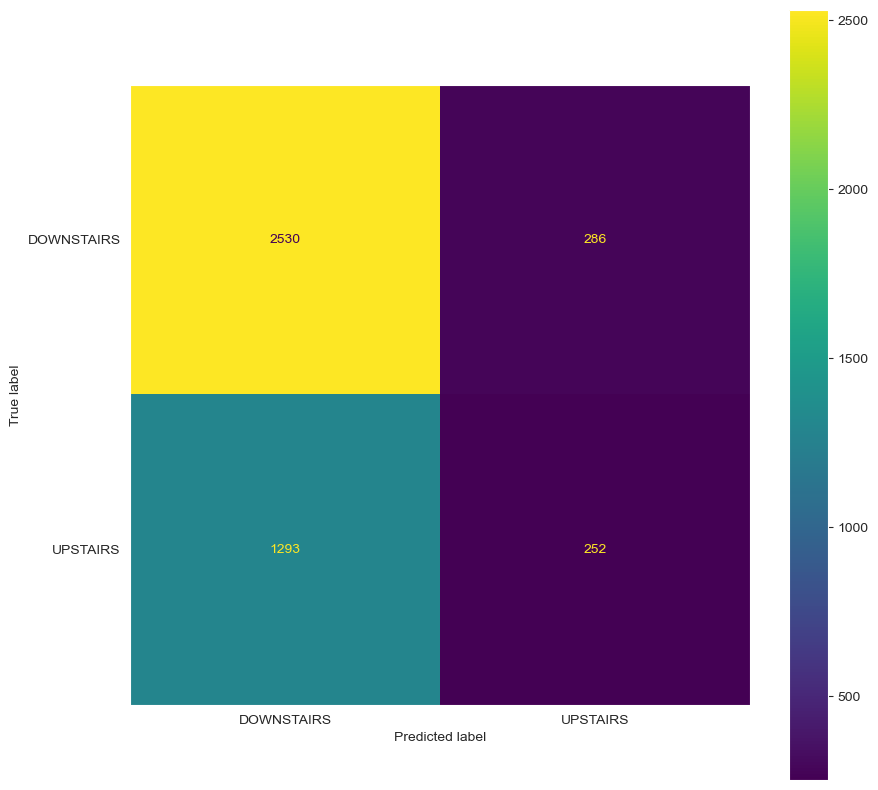

In [149]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

X = full_data.drop(['Activity'], axis=1)
y = full_data['Activity']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)
lrm = LogisticRegression().fit(x_train, y_train)
ld = LinearDiscriminantAnalysis().fit(x_train, y_train)
tdt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(lrm, "LogisticRegression", x_train, x_test, y_train, y_test)